In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load)

df_mouse.head()
df_clinical.head()
# Combine the data into a single dataset

df = pd.merge(df_clinical,df_mouse, on='Mouse ID')


# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

new_df = df[['Drug','Timepoint','Tumor Volume (mm3)']]

# Convert to DataFrame
new_group_df = new_df.groupby([new_df['Drug'],new_df['Timepoint']]).mean().reset_index()
new_group_df

# Preview DataFrame




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_vol_df = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem() ).reset_index()

# Convert to DataFrame

# Preview DataFrame

tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames

formatted_table = new_group_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()

# Preview that Reformatting worked

formatted_table.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
formatted_table2 = tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()
formatted_table2.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


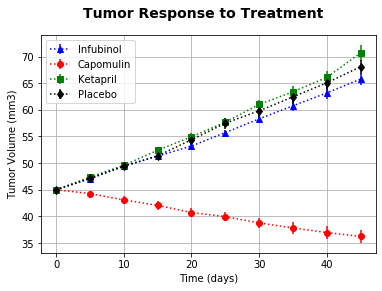

In [16]:
# Generate the Plot (with Error Bars)

fig, (ax1) = plt.subplots()
fig.suptitle("Tumor Response to Treatment", fontsize=14, fontweight="bold")
ax1.errorbar(formatted_table.Timepoint, formatted_table.loc[:,"Infubinol"], marker = "^",color="blue",label="Infubinol",
             yerr = formatted_table2.loc[:,"Infubinol"], linestyle = ":")
ax1.errorbar(formatted_table.Timepoint, formatted_table.loc[:,"Capomulin"], marker = "o",color="red",label="Capomulin",
             yerr = formatted_table2.loc[:,"Capomulin"], linestyle = ":")
ax1.errorbar(formatted_table.Timepoint, formatted_table.loc[:,"Ketapril"], marker = "s",color="green",label="Ketapril",
             yerr = formatted_table2.loc[:,"Ketapril"], linestyle = ":")
ax1.errorbar(formatted_table.Timepoint, formatted_table.loc[:,"Placebo"], marker = "d",color="black",label="Placebo",
             yerr = formatted_table2.loc[:,"Placebo"], linestyle = ":")
plt.legend()
plt.grid(True)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")



# Save the Figure

plt.savefig("../Images/Tumoreresponse.png")



## Metastatic Response to Treatment

In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
site_df = df[['Timepoint','Metastatic Sites','Drug']]
new_site_df = site_df.groupby([site_df['Drug'],site_df['Timepoint']]).mean().reset_index()
new_site_df.head()
# Convert to DataFrame
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [21]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_sites_df = pd.DataFrame(df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem() ).reset_index()

# Convert to DataFrame

# Preview DataFrame
met_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [23]:
# Minor Data Munging to Re-Format the Data Frames
formatted_table_1 = new_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()

# Preview that Reformatting worked
formatted_table_1.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


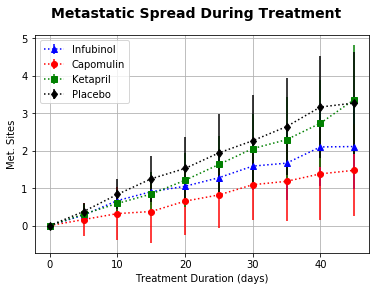

In [27]:
fig, (ax1) = plt.subplots()
fig.suptitle("Metastatic Spread During Treatment", fontsize=14, fontweight="bold")
ax1.errorbar(formatted_table_1.Timepoint, formatted_table_1.loc[:,"Infubinol"], marker = "^",color="blue",label="Infubinol",
             yerr = formatted_table2.loc[:,"Infubinol"], linestyle = ":")
ax1.errorbar(formatted_table_1.Timepoint, formatted_table_1.loc[:,"Capomulin"], marker = "o",color="red",label="Capomulin",
             yerr = formatted_table2.loc[:,"Capomulin"], linestyle = ":")
ax1.errorbar(formatted_table_1.Timepoint, formatted_table_1.loc[:,"Ketapril"], marker = "s",color="green",label="Ketapril",
             yerr = formatted_table2.loc[:,"Ketapril"], linestyle = ":")
ax1.errorbar(formatted_table_1.Timepoint, formatted_table_1.loc[:,"Placebo"], marker = "d",color="black",label="Placebo",
             yerr = formatted_table2.loc[:,"Placebo"], linestyle = ":")
plt.legend()
plt.grid(True)
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met. Sites")
plt.savefig("../Images/Metastaticspread.png")
plt.show()

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_df = df[['Timepoint','Mouse ID','Drug']]
new_mice_df = mice_df.groupby([mice_df['Drug'],mice_df['Timepoint']]).count().reset_index()
new_mice_df.head()

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [35]:
# Minor Data Munging to Re-Format the Data Frames

formatted_table_4 = new_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID').reset_index()

# Preview the Data Frame
formatted_table_4.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


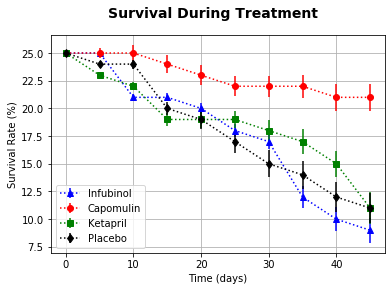

In [36]:
fig, (ax1) = plt.subplots()
fig.suptitle("Survival During Treatment", fontsize=14, fontweight="bold")
ax1.errorbar(formatted_table_4.Timepoint, formatted_table_4.loc[:,"Infubinol"], marker = "^",color="blue",label="Infubinol",
             yerr = formatted_table2.loc[:,"Infubinol"], linestyle = ":")
ax1.errorbar(formatted_table_4.Timepoint, formatted_table_4.loc[:,"Capomulin"], marker = "o",color="red",label="Capomulin",
             yerr = formatted_table2.loc[:,"Capomulin"], linestyle = ":")
ax1.errorbar(formatted_table_4.Timepoint, formatted_table_4.loc[:,"Ketapril"], marker = "s",color="green",label="Ketapril",
             yerr = formatted_table2.loc[:,"Ketapril"], linestyle = ":")
ax1.errorbar(formatted_table_4.Timepoint, formatted_table_4.loc[:,"Placebo"], marker = "d",color="black",label="Placebo",
             yerr = formatted_table2.loc[:,"Placebo"], linestyle = ":")
plt.legend()
plt.grid(True)
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.savefig("../Images/survivalrate.png")
plt.show()

In [37]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [39]:
# Calculate the percent changes for each drug

# Display the data to confirm


# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)